In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dataunderstanding import correlations

#For the complex elaboration
from concurrent.futures import ThreadPoolExecutor

In [2]:
# Carica il dataset da un file CSV
cyclists = pd.read_csv('dataset/cyclists.csv')
races = pd.read_csv('dataset/races.csv')
# Mostra le prime righe del dataset
cyclists.head()


,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France
2,jan-maas,Jan Maas,1996.0,69.0,189.0,Netherlands
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,78.0,192.0,Belgium
4,jose-felix-parra,José Félix Parra,1997.0,55.0,171.0,Spain


In [3]:
cyclists.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB


In [4]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

In [5]:
races['points'] = races['points'].astype(object)
races['uci_points'] = races['uci_points'].astype(object)
races['profile'] = races['profile'].astype(object)
races['startlist_quality'] = races['startlist_quality'].astype(object)



Lo startlist_quality della gara è davvero categorico? Dato che è un valore che non è cappato potrebbe essere numerico.

In [6]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  object 
 3   uci_points           251086 non-null  object 
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  object 
 7   startlist_quality    589865 non-null  object 
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

In [7]:
cyclists.select_dtypes(include="number")


,birth_year,weight,height
0,1964.0,NaN,NaN
1,1965.0,74.0,182.0
2,1996.0,69.0,189.0
3,1995.0,78.0,192.0
4,1997.0,55.0,171.0
...,...,...,...
6129,1966.0,NaN,NaN
6130,1998.0,75.0,188.0
6131,1973.0,NaN,NaN
6132,1985.0,58.0,170.0


In [8]:
races.isnull().sum()

_url                        0
name                        0
points                    477
uci_points             338779
length                      0
climb_total            147045
profile                148194
startlist_quality           0
average_temperature    559932
date                        0
position                    0
cyclist                     0
cyclist_age               113
is_tarmac                   0
is_cobbled                  0
is_gravel                   0
cyclist_team           159161
delta                       0
dtype: int64

In [9]:
races_numerical = races.select_dtypes(include="number")


In [10]:
# Let's see how many missing values there are

cyclists.isnull().sum()

_url              0
name              0
birth_year       13
weight         3056
height         2991
nationality       1
dtype: int64

Almost half of the values for weight and height are missing, can we replace them somehow?
Regarding the birth year, only 13 values are missing, we can easily drop those records without losing too much, but maybe we don't need birth year for the analysis? Same for nationality.

In [11]:
# Print the min value of the weight column
print(cyclists['weight'].min())
# Print the max value of the weight column
print(cyclists['weight'].max())
# Calculate the optimal number of bins using max value - min value
n_bins = int(cyclists['weight'].max() - cyclists['weight'].min())
print(n_bins)

48.0
94.0
46


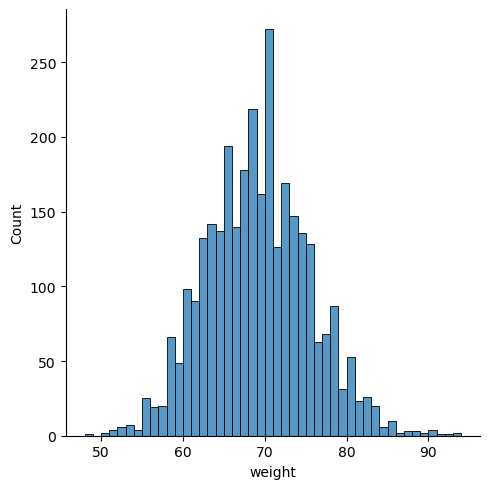

In [12]:
sns.displot(cyclists, 
                x="weight", 
                kind="hist",
                row_order="desc",
                bins=n_bins)

In [13]:
races_numerical = races_numerical.astype('double')
correlations = correlations(races_numerical)
correlations

,length,climb_total,average_temperature,position,cyclist_age,delta,correlation_type
length,1.000000,0.285099,-0.095313,-0.015373,-0.002381,0.029217,kendall
climb_total,0.285099,1.000000,-0.079710,-0.023858,0.005533,0.356194,kendall
average_temperature,-0.095313,-0.079710,1.000000,0.015593,0.033887,0.023630,kendall
position,-0.015373,-0.023858,0.015593,1.000000,0.006378,0.296542,kendall
cyclist_age,-0.002381,0.005533,0.033887,0.006378,1.000000,-0.002685,kendall
delta,0.029217,0.356194,0.023630,0.296542,-0.002685,1.000000,kendall
length,1.000000,0.520616,-0.070199,-0.012024,0.003442,0.092850,pearson
climb_total,0.520616,1.000000,-0.128367,-0.040156,0.007315,0.371062,pearson
average_temperature,-0.070199,-0.128367,1.000000,0.022707,0.040716,0.056668,pearson
position,-0.012024,-0.040156,0.022707,1.000000,0.011984,0.272020,pearson


Cycleists weight median:
69.0
nationality
Tunisia          82.0
Albania          78.0
Lithuania        77.0
Namibia          75.0
New Zealand      74.0
                 ... 
Mexico           59.0
Ethiopia         58.0
Liechtenstein     NaN
Yugoslavia        NaN
Zimbabwe          NaN
Name: weight, Length: 72, dtype: float64


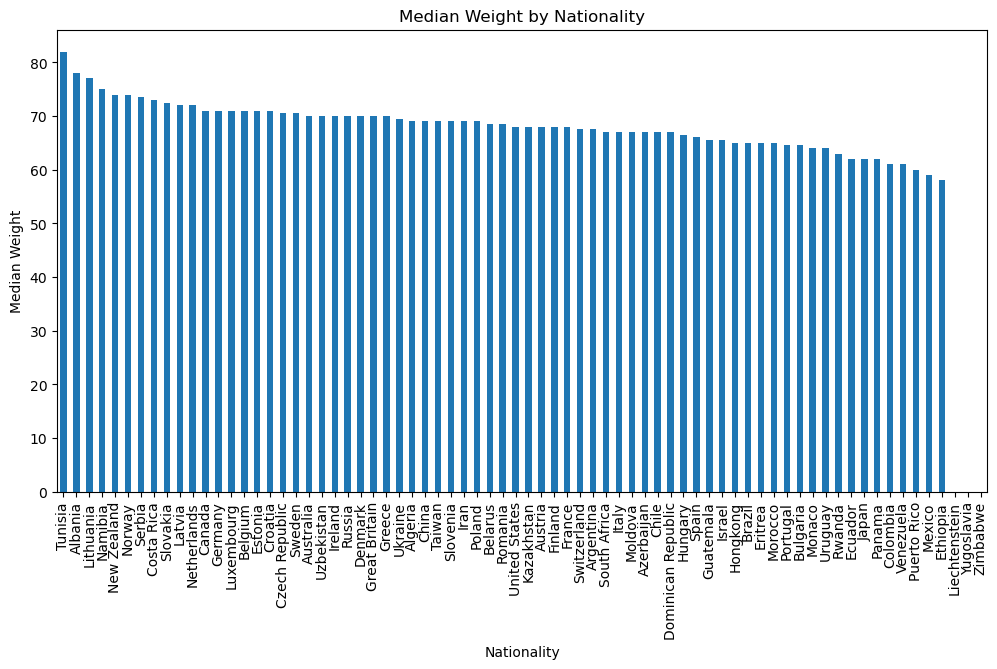

In [14]:
#Calcolate and show the median value of the weight column
print("Cycleists weight median:")
median = cyclists['weight'].median()
print(median)

#Calcolate the median value for each nationality
median_nationality = cyclists.groupby('nationality')['weight'].median().sort_values(ascending=False)
print(median_nationality)

# Plot the median weight for each nationality
median_nationality.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Nationality')
plt.ylabel('Median Weight')
plt.title('Median Weight by Nationality')
plt.show()



In [15]:
# Count where the weight is null, but the height is not null
missing_weight = cyclists[(cyclists['weight'].isnull()) & (cyclists['height'].notnull())]
print("Weight is null, but height is not null:")
print(missing_weight.count())

# Count where the height is null, but the weight is not null
missing_height = cyclists[(cyclists['height'].isnull()) & (cyclists['weight'].notnull())]
print("Height is null, but weight is not null:")
print(missing_height.count())

Weight is null, but height is not null:
_url           72
name           72
birth_year     72
weight          0
height         72
nationality    72
dtype: int64
Height is null, but weight is not null:
_url           7
name           7
birth_year     7
weight         7
height         0
nationality    7
dtype: int64


In [16]:
# Print all % percentage of missing values in the columns
print("Percentage of missing values in the columns:")
print(cyclists.isnull().mean() * 100)


Percentage of missing values in the columns:
_url            0.000000
name            0.000000
birth_year      0.211933
weight         49.820672
height         48.761004
nationality     0.016303
dtype: float64


In [17]:
print("Percentage of missing values in the columns:")
print(races.isnull().mean() * 100)

Percentage of missing values in the columns:
_url                    0.000000
name                    0.000000
points                  0.080866
uci_points             57.433311
length                  0.000000
climb_total            24.928585
profile                25.123376
startlist_quality       0.000000
average_temperature    94.925449
date                    0.000000
position                0.000000
cyclist                 0.000000
cyclist_age             0.019157
is_tarmac               0.000000
is_cobbled              0.000000
is_gravel               0.000000
cyclist_team           26.982615
delta                   0.000000
dtype: float64


In [18]:
cyclists_url = cyclists['_url'].tolist()

def count_races_for_cyclist(url):
    return url, races.apply(lambda row: row.str.contains(url, na=False).sum(), axis=1).sum()

race_counts = {}
with ThreadPoolExecutor(max_workers=10) as executor:
    results = executor.map(count_races_for_cyclist, cyclists_url)
    
# Merge the results into a dictionary
for url, count in results:
    race_counts[url] = count

# Create a DataFrame from the dictionary
race_counts_df = pd.DataFrame(list(race_counts.items()), columns=['_url', 'race_count'])
# Print the number
print(race_counts_df)

: 

: 

# High correlation between height and weight
As we can expect, weight and height are highly correlated, maybe we can merge the two features into one index?

# Obbiettivi:
- Capire i campi e a cosa possono servire
- Quanti campi sono null per ogni matrice
- pene
- Che tipo di cleaning poter fare
- 